In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage import color
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [2]:
data = []
Y = []
img_array=[]
for word in ['Bird', 'Cat', 'Fish', 'Dog']:
    for i in range(1, 41):
        if i==15 and word=='Fish':
            image = Image.open("E:/Fall 19/Data Science/Image Classification/images/"+word+' '+str(i)+".jpeg")
        else:
            image = Image.open("E:/Fall 19/Data Science/Image Classification/images/"+word+' '+str(i)+".jpg")
        image = image.resize((50, 50), Image.ANTIALIAS)
        temp = np.asarray(image, dtype = 'int32')
        temp = np.dot(temp, [0.299, 0.587, 0.114])
        img_array.append(image)
        data.append(temp)
        Y.append(word)

In [3]:
data = np.asarray(data)
data.shape

(160, 50, 50)

In [4]:
data = data.transpose(0, 1, 2).reshape(160, -1)
data.shape

(160, 2500)

In [5]:
Y = np.asarray(Y)
Y.shape

(160,)

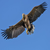

In [6]:
img_array[5]

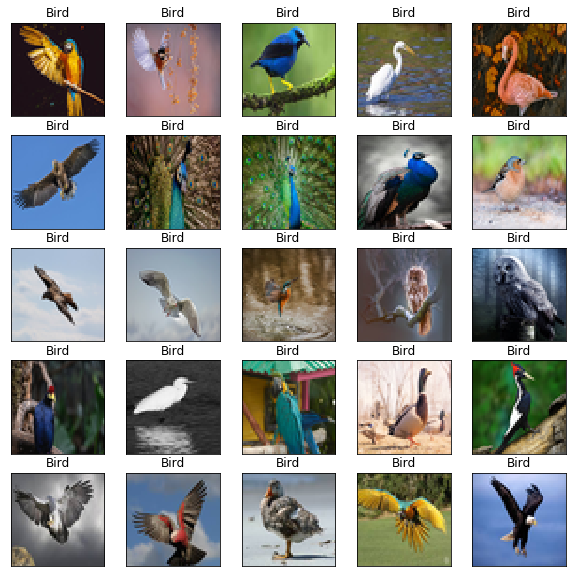

In [7]:
fig, ax = plt.subplots(5, 5, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(img_array[i], cmap='bone')
    axi.set_title(Y[i])
    axi.set(xticks=[], yticks=[])

In [8]:
data.shape

(160, 2500)

In [9]:
Y.shape

(160,)

In [10]:

Xtrain, Xtest, ytrain, ytest = train_test_split(data, Y, test_size=0.3, stratify = Y ,random_state=0)

In [11]:
def svc_model(n):
    pca = PCA(svd_solver='randomized', n_components=n, whiten=True, random_state=0)
    svc = SVC(kernel='rbf',  class_weight='balanced', gamma='scale', C=1)
    model = make_pipeline(pca, svc)
    model.fit(Xtrain, ytrain)
    y_test_hat = model.predict(Xtest)
    return accuracy_score(ytest, y_test_hat)

In [12]:
def neural_networks(n):
    pca = PCA(svd_solver='randomized', n_components=n, whiten=True, random_state=0)
    nn = MLPClassifier(solver='lbfgs',random_state=0, hidden_layer_sizes=[10])
    model = make_pipeline(pca, nn)
    model.fit(Xtrain, ytrain)
    y_test_hat = model.predict(Xtest)
    return accuracy_score(ytest, y_test_hat)

In [13]:
def random_forest(n):
    forest = RandomForestClassifier(n_estimators = 4, max_depth = 10, random_state=0)
    pca = PCA(svd_solver='randomized', n_components=n, whiten=True, random_state=0)
    model = make_pipeline(pca, forest)
    model.fit(Xtrain, ytrain)
    y_test_hat = model.predict(Xtest)
    return accuracy_score(ytest, y_test_hat)

In [14]:
#Find best n's: make a set of n where acc > .4
best_ns = set()
for i in range(1,41):
    if svc_model(i) > .4 and random_forest(i) > .4 and neural_networks(i) > .4:
        best_ns.add(i)
print(best_ns)

{40, 29}


In [15]:
best_avg = 0
best_n = 0
for n in best_ns:
    svc = svc_model(n)
    rf = random_forest(n)
    nn = neural_networks(n)
    avg = (svc + rf + nn)/3
    if avg > best_avg:
        best_avg = avg
        best_n = n
    print('n =', n)
    print('SVC acc =', svc)
    print('R Forest acc=', rf)
    print('N Network acc=', nn)
    print('Average acc=', avg)
    print()

print('Best avg =', best_avg, 'at n =', best_n)
    

n = 40
SVC acc = 0.4375
R Forest acc= 0.4583333333333333
N Network acc= 0.4166666666666667
Average acc= 0.4375

n = 29
SVC acc = 0.4166666666666667
R Forest acc= 0.4583333333333333
N Network acc= 0.4375
Average acc= 0.4375

Best avg = 0.4375 at n = 40


In [16]:
#best n was 
n_components = best_n
pca = PCA(svd_solver='randomized', n_components=n_components, whiten=True, random_state=0)

In [17]:
#SVC
svc = SVC(kernel='sigmoid',  class_weight='balanced', gamma='scale', C=1, probability = True)
svc_model = make_pipeline(pca, svc)

In [18]:
#Random Forest
forest = RandomForestClassifier(n_estimators = 4, max_depth = 10, random_state=0)
forest_model = make_pipeline(pca, forest)

In [19]:
#Neural Network
nn = MLPClassifier(solver='lbfgs',random_state=0, hidden_layer_sizes=[10])
network_model = make_pipeline(pca, nn)

In [20]:
#train models
svc_model.fit(Xtrain, ytrain);
forest_model.fit(Xtrain, ytrain);
network_model.fit(Xtrain, ytrain);

In [21]:
#test models
svc_y_hat = svc_model.predict(Xtest)
forest_y_hat = forest_model.predict(Xtest)
network_y_hat = network_model.predict(Xtest)
print('Test Results:')
print('SVC model:')
print(classification_report(ytest, svc_y_hat))
print('Random Forest model:')
print(classification_report(ytest, forest_y_hat))
print('Neural Network model:')
print(classification_report(ytest, network_y_hat))

Test Results:
SVC model:
              precision    recall  f1-score   support

        Bird       0.29      0.33      0.31        12
         Cat       0.56      0.42      0.48        12
         Dog       0.25      0.17      0.20        12
        Fish       0.35      0.50      0.41        12

   micro avg       0.35      0.35      0.35        48
   macro avg       0.36      0.35      0.35        48
weighted avg       0.36      0.35      0.35        48

Random Forest model:
              precision    recall  f1-score   support

        Bird       0.37      0.58      0.45        12
         Cat       0.38      0.25      0.30        12
         Dog       0.50      0.50      0.50        12
        Fish       0.67      0.50      0.57        12

   micro avg       0.46      0.46      0.46        48
   macro avg       0.48      0.46      0.46        48
weighted avg       0.48      0.46      0.46        48

Neural Network model:
              precision    recall  f1-score   support

       

The Random Forest model performed the best, with an overall F1 Score of 0.52

In [22]:
#Plot ROC curves and show AUC score:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [23]:
from sklearn.preprocessing import label_binarize
y_binary = label_binarize(ytest, classes=['Bird', 'Cat', 'Fish', 'Dog'])
n_classes = 4

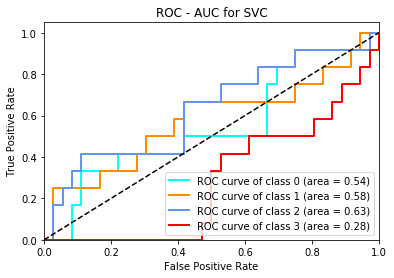

In [24]:
#referred from sklearn-ROC curve for multiclass
from sklearn.metrics import roc_curve
from itertools import cycle
from sklearn.metrics import auc
fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 2
Y_score = svc_model.predict_proba(Xtest)
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_binary[:,i], Y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))


# Plot all ROC curves
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - AUC for SVC')
plt.legend(loc="lower right")
plt.show()

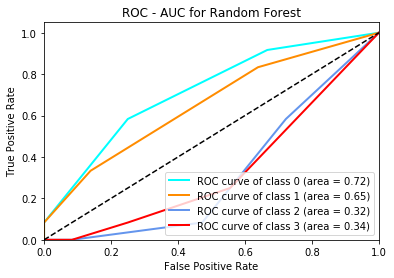

In [25]:
#referred from sklearn-ROC curve for multiclass
from sklearn.metrics import roc_curve
from itertools import cycle
from sklearn.metrics import auc
fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 2
Y_score = forest_model.predict_proba(Xtest)
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_binary[:,i], Y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))


# Plot all ROC curves
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - AUC for Random Forest')
plt.legend(loc="lower right")
plt.show()

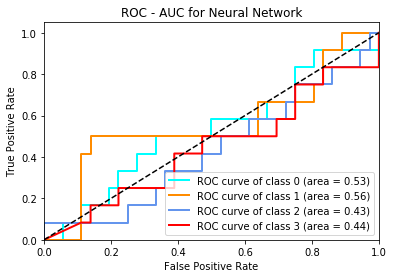

In [26]:
#referred from sklearn-ROC curve for multiclass
from sklearn.metrics import roc_curve
from itertools import cycle
from sklearn.metrics import auc
fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 2
Y_score = network_model.predict_proba(Xtest)
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_binary[:,i], Y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))


# Plot all ROC curves
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - AUC for Neural Network')
plt.legend(loc="lower right")
plt.show()

In [27]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
#Using crossing validation with StratifiedKFold with 5 splits
cv= StratifiedKFold(n_splits = 5, random_state=0, shuffle = True)
accuracy_svc = cross_val_score(svc_model, data, Y, cv=cv, scoring = 'accuracy')
print("Accuracies: ",accuracy_svc)
print("Mean Accuracies: ", np.mean(accuracy_svc))

Accuracies:  [0.46875 0.46875 0.40625 0.4375  0.3125 ]
Mean Accuracies:  0.41875


In [28]:
#Using crossing validation with StratifiedKFold with 5 splits
cv= StratifiedKFold(n_splits = 5, random_state=0, shuffle = True)
accuracy_network = cross_val_score(network_model, data, Y, cv=cv, scoring = 'accuracy')
print("Accuracies: ",accuracy_network)
print("Mean Accuracies: ", np.mean(accuracy_network))

Accuracies:  [0.46875 0.46875 0.34375 0.25    0.34375]
Mean Accuracies:  0.375


In [29]:
#Using crossing validation with StratifiedKFold with 5 splits
cv= StratifiedKFold(n_splits = 5, random_state=0, shuffle = True)
accuracy_forest = cross_val_score(forest_model, data, Y, cv=cv, scoring = 'accuracy')
print("Accuracies: ",accuracy_forest)
print("Mean Accuracies: ", np.mean(accuracy_forest))

Accuracies:  [0.3125  0.34375 0.21875 0.375   0.1875 ]
Mean Accuracies:  0.2875


In [30]:
print('SVC model:')
print("Classic Accuracy:", accuracy_score(ytest, svc_y_hat))
print("Stratified Accuracy: ", np.mean(accuracy_svc))
print(" ")
print('Random Forest model:')
print("Classic Accuracy:", accuracy_score(ytest, forest_y_hat))
print("Stratified Accuracy: ", np.mean(accuracy_forest))
print(" ")
print('Neural Network model:')
print("Classic Accuracy:", accuracy_score(ytest, network_y_hat))
print("Stratified Accuracy: ", np.mean(accuracy_network))

SVC model:
Classic Accuracy: 0.3541666666666667
Stratified Accuracy:  0.41875
 
Random Forest model:
Classic Accuracy: 0.4583333333333333
Stratified Accuracy:  0.2875
 
Neural Network model:
Classic Accuracy: 0.4166666666666667
Stratified Accuracy:  0.375


<p>The Accuracy Score is improved for SVC and Neural Network models after Stratifyting the Training Data. The Accuracry has dropped in the case of Random Forest which can be because of the model might be overffiting</p>

In [31]:
from sklearn.model_selection import GridSearchCV
#Grid search with cross validation for SVC
#Setup SVC
svc = SVC(kernel='rbf',  class_weight='balanced')
# Create pipleline model
model = make_pipeline(pca, svc)
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
param_grid = {'svc__C': [.1, 1, 5, 10, 50],
              'svc__gamma': ['scale','auto']
             }
svc_grid = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy')
svc_grid.fit(Xtrain, ytrain)
print(svc_grid.best_params_)
bestmodel_svc = svc_grid.best_estimator_
y_grid_svc = bestmodel_svc.predict(Xtest)

{'svc__C': 5, 'svc__gamma': 'scale'}


C:\Users\Moni\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [32]:
#Grid search with cross validation for Neural Network
nn = MLPClassifier(solver='lbfgs',random_state=0)
# Create pipleline model
model = make_pipeline(pca, nn)
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
param_grid = {'mlpclassifier__hidden_layer_sizes': [[100], [75], [50], [20], [10], [10, 5], [10, 3], [10, 5, 2]]}
network_grid = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy')
network_grid.fit(Xtrain, ytrain)
print(network_grid.best_params_)
bestmodel_network = network_grid.best_estimator_
y_grid_network = bestmodel_network.predict(Xtest)

C:\Users\Moni\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'mlpclassifier__hidden_layer_sizes': [10, 5]}


In [33]:
#Grid search with cross validation for random forest
forest = RandomForestClassifier(random_state=0)
# Create pipleline model
model = make_pipeline(pca, forest)
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
param_grid = {'randomforestclassifier__n_estimators': [1, 4, 5, 10, 50,100],
             'randomforestclassifier__max_depth':[1,5,10,50,100]}
forest_grid = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy')
forest_grid.fit(Xtrain, ytrain)
print(forest_grid.best_params_)
bestmodel_forest = forest_grid.best_estimator_
y_grid_forest = bestmodel_forest.predict(Xtest)
#model = RandomForestClassifier(n_estimators=100, random_state=0)

{'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 100}


C:\Users\Moni\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [36]:
print('Train Data Accuracies')
print('SVC model:')
print("Classic Accuracy:", accuracy_score(ytrain, svc_model.predict(Xtrain)))
print("Grid Search Accuracy: ", accuracy_score(ytrain, bestmodel_svc.predict(Xtrain)))
print(" ")
print('Random Forest model:')
print("Classic Accuracy:", accuracy_score(ytrain, forest_model.predict(Xtrain)))
print("Grid Search Accuracy: ", accuracy_score(ytrain, bestmodel_forest.predict(Xtrain)))
print(" ")
print('Neural Network model:')
print("Classic Accuracy:", accuracy_score(ytrain, network_model.predict(Xtrain)))
print("Grid Search Accuracy: ", accuracy_score(ytrain, bestmodel_network.predict(Xtrain)))

Train Data Accuracies
SVC model:
Classic Accuracy: 0.5892857142857143
Grid Search Accuracy:  0.9821428571428571
 
Random Forest model:
Classic Accuracy: 0.8928571428571429
Grid Search Accuracy:  1.0
 
Neural Network model:
Classic Accuracy: 1.0
Grid Search Accuracy:  0.9642857142857143


<p>The accuracies are pretty high for training data which shows that the models are overfitting. This is obsserved more in Random Forest and Neural Network models which is the reason for drop in accuracy for test data.</p>

In [35]:
print('Test Data Accuracies')
print('SVC model:')
print("Classic Accuracy:", accuracy_score(ytest, svc_y_hat))
print("Grid Search Accuracy: ", accuracy_score(ytest, y_grid_svc))
print(" ")
print('Random Forest model:')
print("Classic Accuracy:", accuracy_score(ytest, forest_y_hat))
print("Grid Search Accuracy: ", accuracy_score(ytest, y_grid_forest))
print(" ")
print('Neural Network model:')
print("Classic Accuracy:", accuracy_score(ytest, network_y_hat))
print("Grid Search Accuracy: ", accuracy_score(ytest, y_grid_network))

Test Data Accuracies
SVC model:
Classic Accuracy: 0.3541666666666667
Grid Search Accuracy:  0.4375
 
Random Forest model:
Classic Accuracy: 0.4583333333333333
Grid Search Accuracy:  0.5208333333333334
 
Neural Network model:
Classic Accuracy: 0.4166666666666667
Grid Search Accuracy:  0.3125


<p>The best model for the image classification of our dataset is <b>Random Forest</b> with the accuracy of <b>52.08%</b>. With the help of Grid Search we got the best hyperparameters which improved the accuracies.</p>

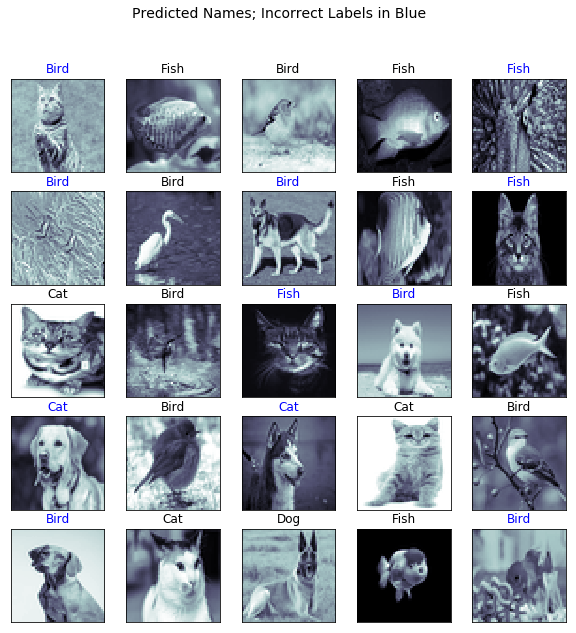

In [38]:
fig, ax = plt.subplots(5, 5, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(50, 50), cmap='bone')
    axi.set_title(y_grid_forest[i], color='black' if y_grid_forest[i] == ytest[i] else 'blue')
    axi.set(xticks=[], yticks=[])
    
fig.suptitle('Predicted Names; Incorrect Labels in Blue', size=14);